In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("../tracker_stubs/ball_detections.pkl", 'rb') as f:
    ball_positions = pickle.load(f)

In [3]:
ball_positions = [x.get(1, []) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [4]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

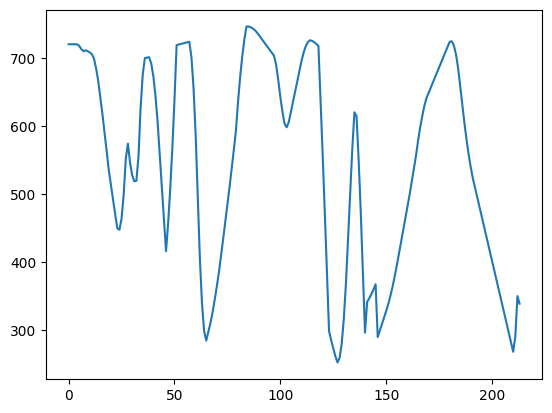

In [5]:
# plot mid_y rolling mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [6]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

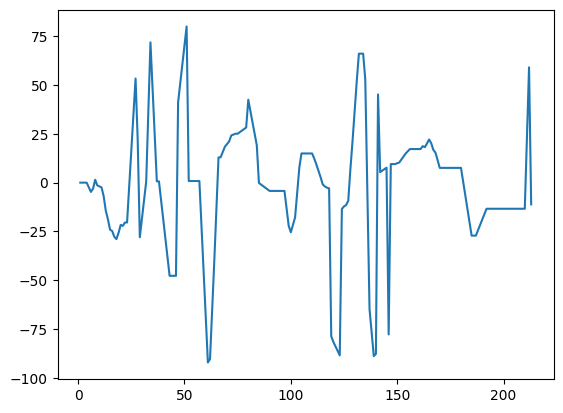

In [7]:
# plot mid_y_rolling mean
plt.plot(df_ball_positions['delta_y'])

In [8]:
df_ball_positions['ball_hit'] = 0

In [32]:
minimum_delta_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_delta_frames_for_hit*1.2)):
    neg_pos_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    plus_pos_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if neg_pos_change or plus_pos_change:
        change_frame_count = 0
        for j in range(i+1, len(df_ball_positions) - int(minimum_delta_frames_for_hit*1.2)):
            neg_pos_change_next_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[j] < 0
            plus_pos_change_next_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[j] > 0

            if neg_pos_change and neg_pos_change_next_frame:
                change_frame_count += 1
            elif plus_pos_change and plus_pos_change_next_frame:
                change_frame_count += 1

        if change_frame_count > minimum_delta_frames_for_hit:
            df_ball_positions['ball_hit'].iloc[i] = 1

/var/folders/gd/27_ffn191334fg1hsfv36td80000gn/T/ipykernel_13472/2760041090.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
/var/folders/gd/27_ffn191334fg1hsfv36td80000gn/T/ipykernel_13472/27600

In [33]:
frames_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

In [34]:
frames_with_ball_hits

[7, 8, 24, 28, 31, 38, 46, 57, 65, 84, 103, 127, 140, 146]

In [35]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
7,811.340576,692.821716,832.794861,715.954468,704.388092,709.667706,-3.101154,1
8,796.359436,717.107483,814.897034,737.388794,727.248138,711.138562,1.470856,1
24,881.471466,470.085037,899.508957,489.986664,480.035851,447.102049,-1.983837,1
28,913.770996,508.454636,930.878448,527.177734,517.816185,573.774855,21.919890,1
31,938.651428,569.829844,955.487488,588.041300,578.935572,518.384300,-8.947702,1
38,1010.737122,692.070923,1029.690308,712.310120,702.190521,700.904938,0.642792,1
46,931.473633,308.860687,952.378052,331.278107,320.069397,415.599678,-47.765141,1
57,1034.510132,715.549988,1052.665771,735.024170,725.287079,723.633966,0.826556,1
65,860.474426,300.931824,877.129242,318.686935,309.809380,283.953059,-13.821926,1
84,870.213428,734.923730,889.634033,756.617554,745.770642,746.108191,19.125302,1
